# Ingest autophagy imaging data

The images used here were acquired as part of a study ([Publication](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.biorxiv.org/content/10.1101/2023.06.01.542416v1&ved=2ahUKEwj3m56hs52LAxWxRfEDHQZwKZ8QFnoECBIQAQ&usg=AOvVaw04HsGDIPcIPr1ldblXuh0Z)) on autophagy, a cellular process during which cells recycle their components in autophagosomes.
To identify genetic determinants of autophagy, the study tracked the formation of autophagosomes through microscopy of the fluorescent autophagosome marker mCherry-LC3B following treatment of cells with the autophagy inducer *Torin-1*.

Here, we ingest the microscopy data, consisting of TIFF image stacks and the corresponding metadata file - a standard format for such imaging experiments.

In [1]:
import lamindb as ln
import pandas as pd
import tifffile
import matplotlib.pyplot as plt

ln.track()

assert ln.setup.settings.instance.slug == "scportrait/examples"

→ connected lamindb: scportrait/examples
→ there already is a notebook with `key` 'imaging_ingest.ipynb', creating new version 'asoq6WyPequ80005'
→ created Transform('asoq6WyPequ80005'), started new Run('IEg1TkAf...') at 2025-02-23 14:01:50 UTC
→ notebook imports: lamindb==1.1.0 matplotlib==3.10.0 pandas==2.2.3 tifffile==2025.1.10


In [2]:
# The metadata file contains the file paths of the images and all associated metadata
# We can load it later to annotate the imaging data
metadata = pd.read_csv("input_data_imaging_usecase/metadata_files.csv")
metadata.head(3)

,image_path,genotype,stimulation,cell_line,cell_line_clone,channel,FOV,magnification,microscope,imaged structure,resolution
0,input_data_imaging_usecase/images/Timepoint001...,WT,14h Torin-1,U2OS,U2OS lcklip-mNeon mCherryLC3B clone 1,Alexa488,FOV1,20X,Opera Phenix,LckLip-mNeon,0.597976
1,input_data_imaging_usecase/images/Timepoint001...,WT,14h Torin-1,U2OS,U2OS lcklip-mNeon mCherryLC3B clone 1,Alexa488,FOV2,20X,Opera Phenix,LckLip-mNeon,0.597976
2,input_data_imaging_usecase/images/Timepoint001...,WT,14h Torin-1,U2OS,U2OS lcklip-mNeon mCherryLC3B clone 1,DAPI,FOV1,20X,Opera Phenix,DNA,0.597976


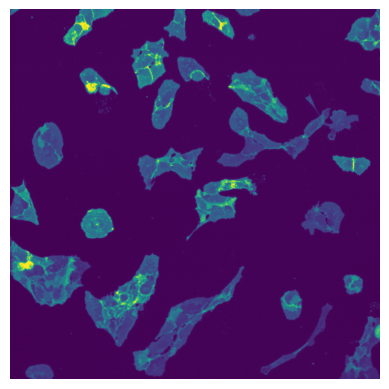

In [3]:
# An example image
img = tifffile.imread(metadata.iloc[0]["image_path"])
plt.imshow(img)
plt.axis("off")
plt.show()

In [4]:
# Ingest the imaging data directory, using the image_path prefix as the key
# This ensures that the image_path and loaded Artifact paths still align
artifacts = ln.Artifact.from_dir(
    "./input_data_imaging_usecase", key="input_data_imaging_usecase"
)
ln.save(artifacts)

→ found artifact with same hash: Artifact(uid='Xt8W9BdCqY6Mx8n40002', is_latest=True, key='input_data_imaging_usecase/metadata_files.csv', suffix='.csv', size=10042, hash='a7CkUMHoVKnaN0irNdk1zg', space_id=1, storage_id=1, run_id=106, created_by_id=3, created_at=2025-02-23 12:27:07 UTC); to track this artifact as an input, use: ln.Artifact.get()
→ found artifact with same hash: Artifact(uid='GFbOzCpewsYqAERg0000', is_latest=True, key='input_data_imaging_usecase/config.yml', description='config for scportrait for processing of cells stained for autophagy markers', suffix='.yml', size=842, hash='5ZDy0Ef5vApcEcU0c8U8HQ', space_id=1, storage_id=1, run_id=106, created_by_id=4, created_at=2025-01-26 15:46:07 UTC); to track this artifact as an input, use: ln.Artifact.get()
→ found artifact with same hash: Artifact(uid='U2XUrYzh2XbSSDvr0000', is_latest=True, key='input_data_imaging_usecase/images/Timepoint001_Row04_Well01_mCherry_zstack001_r001_c002.tif', description='raw image of U2OS cells s

In [5]:
ln.Collection(
    artifacts,
    key="input_data_imaging_usecase",
    description="TIFF stacks and metadata of mCherry-LC3B microscopy.",
).save()

! returning existing collection with same hash: Collection(uid='W0RW2cYcQUqFfrJy0000', is_latest=True, key='input_data_imaging_usecase', description='TIFF stacks and metadata of mCherry-LC3B microscopy.', hash='eTH09h0RFo1pKdh0MRcD8Q', created_by_id=3, space_id=1, run_id=106, created_at=2025-02-23 14:00:24 UTC); if you intended to query to track this collection as an input, use: ln.Collection.get()


Collection(uid='W0RW2cYcQUqFfrJy0000', is_latest=True, key='input_data_imaging_usecase', description='TIFF stacks and metadata of mCherry-LC3B microscopy.', hash='eTH09h0RFo1pKdh0MRcD8Q', created_by_id=3, space_id=1, run_id=107, created_at=2025-02-23 14:00:24 UTC)

In [6]:
ln.finish()

• please hit CTRL + s to save the notebook in your editor .... still waiting .....
. ✓
→ finished Run('IEg1TkAf') after 22s at 2025-02-23 14:02:12 UTC
→ go to: https://lamin.ai/scportrait/examples/transform/asoq6WyPequ80005
→ to update your notebook from the CLI, run: lamin save /home/lukas/code/lamin-usecases/docs/imaging_ingest.ipynb
